In [36]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 

In [23]:
new_life = pd.read_csv('NewLifeAnalytics.csv')

In [24]:
#See first five rows of data 
new_life.head()

,Date,Day_of_Week,Wake_Up_Time,Bed_Time,Water_Drank,Creatine,Work_Out,Hours_of_Sleep,Rosary,Journal,Brushed_Teeth,Vitamins,Golf_Balls_Hit,Pages_Read,Screen_Time,Physical_Readiness,Mental_Readiness,Happiness_Level,Extra_Caffeine
0,1/11/2021,Monday,7,12,72,No,Yes,7,No,No,2,No,75,25,5,8,5,6,Bang
1,1/12/2021,Tuesday,7,11,36,Yes,No,7,No,No,2,Yes,15,0,4,7,4,4,No
2,1/13/2021,Wednesday,7,10,80,Yes,Yes,8,No,No,2,Yes,40,30,4,7,5,6,No
3,1/14/2021,Thursday,6,11,48,Yes,Yes,7,Yes,No,2,Yes,0,0,4,7,4,4,Pre-workout
4,1/15/2021,Friday,7,11,96,Yes,Yes,7,No,No,1,Yes,75,20,6,3,5,8,Pre-workout


In [25]:
#see how large DataFrame is
new_life.shape

(17, 19)

In [5]:
#Querying Data
new_life.loc[:, ['Creatine', 'Rosary']]

,Creatine,Rosary
0,No,No
1,Yes,No
2,Yes,No
3,Yes,Yes
4,Yes,No
5,Yes,Yes
6,No,No
7,No,No
8,Yes,Yes
9,Yes,Yes


In [28]:
#Query for Sleep over 6 hours and prayed Rosary
new_life.loc[(new_life.Hours_of_Sleep > 6) & (new_life.Rosary == 'Yes')]

,Date,Day_of_Week,Wake_Up_Time,Bed_Time,Water_Drank,Creatine,Work_Out,Hours_of_Sleep,Rosary,Journal,Brushed_Teeth,Vitamins,Golf_Balls_Hit,Pages_Read,Screen_Time,Physical_Readiness,Mental_Readiness,Happiness_Level,Extra_Caffeine
3,1/14/2021,Thursday,6,11,48,Yes,Yes,7,Yes,No,2,Yes,0,0,4,7,4,4,Pre-workout
5,1/16/2021,Saturday,7,2,70,Yes,No,7,Yes,No,2,No,0,30,5,4,4,7,Bublr
8,1/19/2021,Tuesday,7,10,36,Yes,Yes,8,Yes,No,2,Yes,55,30,4,3,6,5,Celsius
9,1/20/2021,Wednesday,6,11,24,Yes,No,8,Yes,No,2,Yes,30,100,4,6,3,4,No
10,1/21/2021,Thursday,6,10,48,Yes,No,8,Yes,No,2,Yes,50,30,4,4,2,3,NaN
11,1/22/2021,Friday,7,10,24,Yes,Yes,8,Yes,No,2,Yes,50,20,5,6,3,4,NaN


In [29]:
#Average of sleep
new_life.Hours_of_Sleep.mean()

7.235294117647059

In [30]:
#Find difference in sleep that night compared to average 
sleep_mean = new_life.Hours_of_Sleep.mean()
new_life.Hours_of_Sleep.map(lambda p: p - sleep_mean)

0    -0.235294
1    -0.235294
2     0.764706
3    -0.235294
4    -0.235294
5    -0.235294
6    -0.235294
7    -0.235294
8     0.764706
9     0.764706
10    0.764706
11    0.764706
12   -1.235294
13    1.764706
14   -2.235294
15   -0.235294
16   -0.235294
Name: Hours_of_Sleep, dtype: float64

In [31]:
#Set Hours of sleep to the difference from the mean
def remean_sleep(row):
    row.Hours_of_Sleep = row.Hours_of_Sleep - sleep_mean
    return row

new_life.apply(remean_sleep, axis = 'columns')

,Date,Day_of_Week,Wake_Up_Time,Bed_Time,Water_Drank,Creatine,Work_Out,Hours_of_Sleep,Rosary,Journal,Brushed_Teeth,Vitamins,Golf_Balls_Hit,Pages_Read,Screen_Time,Physical_Readiness,Mental_Readiness,Happiness_Level,Extra_Caffeine
0,1/11/2021,Monday,7,12,72,No,Yes,-0.235294,No,No,2,No,75,25,5,8,5,6,Bang
1,1/12/2021,Tuesday,7,11,36,Yes,No,-0.235294,No,No,2,Yes,15,0,4,7,4,4,No
2,1/13/2021,Wednesday,7,10,80,Yes,Yes,0.764706,No,No,2,Yes,40,30,4,7,5,6,No
3,1/14/2021,Thursday,6,11,48,Yes,Yes,-0.235294,Yes,No,2,Yes,0,0,4,7,4,4,Pre-workout
4,1/15/2021,Friday,7,11,96,Yes,Yes,-0.235294,No,No,1,Yes,75,20,6,3,5,8,Pre-workout
5,1/16/2021,Saturday,7,2,70,Yes,No,-0.235294,Yes,No,2,No,0,30,5,4,4,7,Bublr
6,1/17/2021,Sunday,9,10,48,No,No,-0.235294,No,No,2,Yes,0,20,4,3,6,6,No
7,1/18/2021,Monday,7,11,24,No,No,-0.235294,No,No,2,No,5,30,4,4,4,4,No
8,1/19/2021,Tuesday,7,10,36,Yes,Yes,0.764706,Yes,No,2,Yes,55,30,4,3,6,5,Celsius
9,1/20/2021,Wednesday,6,11,24,Yes,No,0.764706,Yes,No,2,Yes,30,100,4,6,3,4,No


In [34]:
#Numeric values and categorical values
df_num = new_life[['Wake_Up_Time', 'Bed_Time', 'Water_Drank', 'Hours_of_Sleep', 'Brushed_Teeth', 'Golf_Balls_Hit', 'Pages_Read', 'Screen_Time', 'Physical_Readiness', 'Mental_Readiness', 'Happiness_Level']]
df_cat = new_life[['Day_of_Week', 'Creatine', 'Rosary', 'Work_Out', 'Journal', 'Vitamins']]

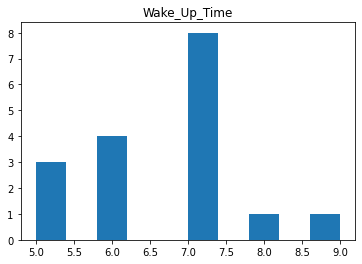

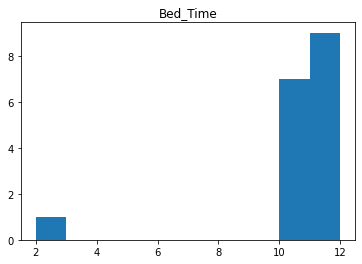

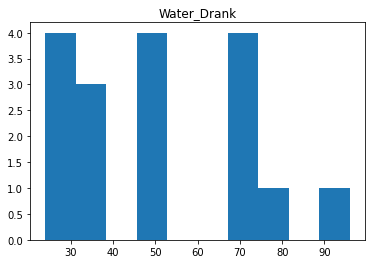

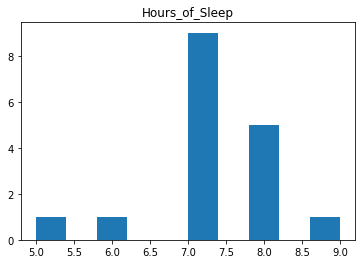

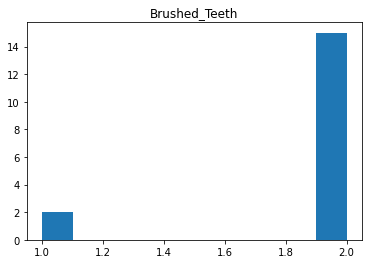

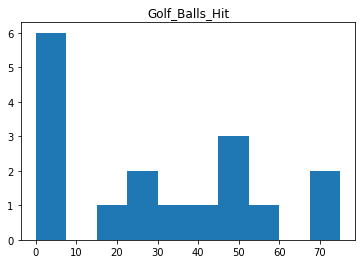

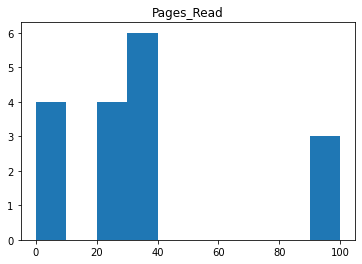

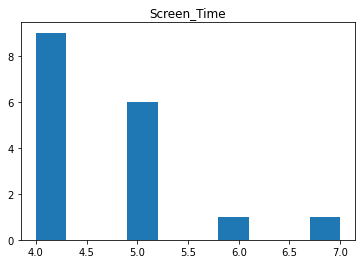

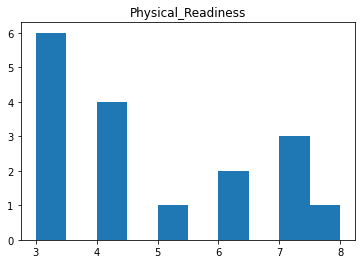

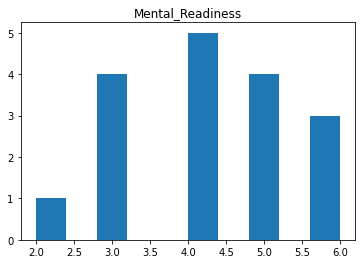

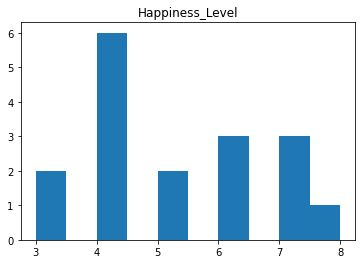

In [38]:
#Distributions for numerica data
for i in df_num.columns:
    plt.hist(df_num[i])
    plt.title(i)
    plt.show()

                    Wake_Up_Time  Bed_Time  Water_Drank  Hours_of_Sleep  \
Wake_Up_Time            1.000000 -0.085735    -0.000910        0.432142   
Bed_Time               -0.085735  1.000000    -0.202322       -0.014961   
Water_Drank            -0.000910 -0.202322     1.000000       -0.136481   
Hours_of_Sleep          0.432142 -0.014961    -0.136481        1.000000   
Brushed_Teeth          -0.322497 -0.152617    -0.227427       -0.318593   
Golf_Balls_Hit         -0.167899  0.287523     0.215545        0.022143   
Pages_Read             -0.548944 -0.005473    -0.300818       -0.250485   
Screen_Time            -0.236538 -0.109788     0.552088       -0.047222   
Physical_Readiness     -0.001964  0.205494     0.095397        0.085579   
Mental_Readiness        0.667682  0.084440     0.308664        0.176272   
Happiness_Level         0.490246 -0.228738     0.649198        0.023840   

                    Brushed_Teeth  Golf_Balls_Hit  Pages_Read  Screen_Time  \
Wake_Up_Time         

<AxesSubplot:>

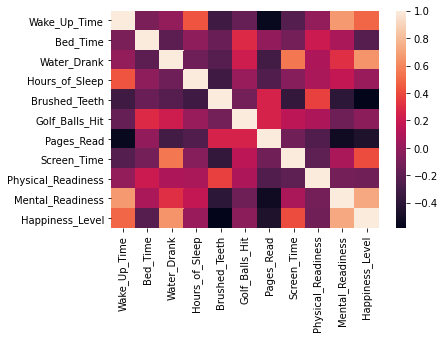

In [39]:
print(df_num.corr())
sns.heatmap(df_num.corr())

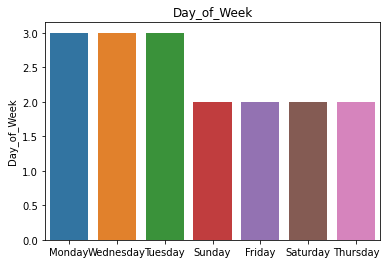

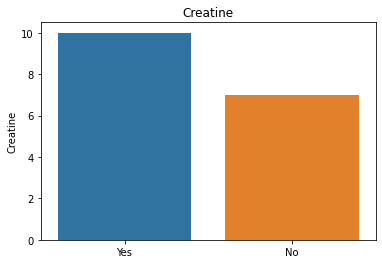

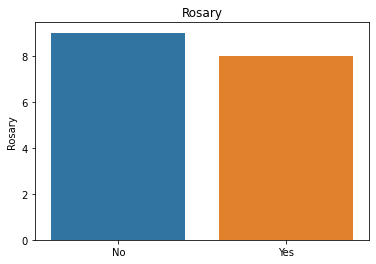

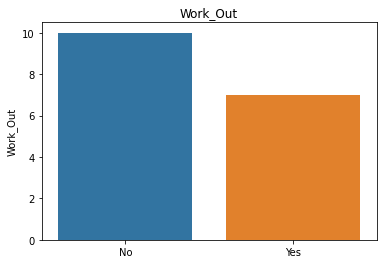

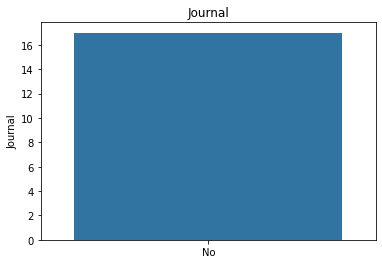

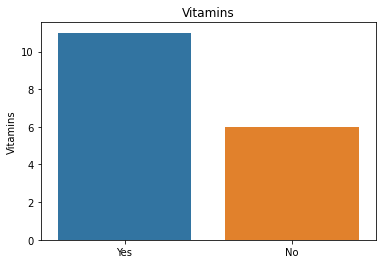

In [42]:
#categorical variable exploration
for i in df_cat.columns:
    sns.barplot(df_cat[i].value_counts().index, df_cat[i].value_counts()).set_title(i)
    plt.show()